<img align="left" src="../images/Guyman-Helmet-On-icon.png">

# L-Met 

## Exemple d'utilisation : code MMFE / Cas simple à 1D

---


In [2]:
# If LMet is not in your PYTHONPATH
import sys
sys.path.append('../')

In [3]:
%matplotlib inline

from pylab import *
from math import radians
from LMet.material import *
from LMet.mmfe import *
from LMet.signature import *

%load_ext autoreload
%autoreload 2

### Définition du créneau

Il s'agit là d'une définition de bas niveau des données du calcul.

La classe *grating* permet un paramétrage plus facile.

In [5]:
air = material("constant", 1+0j)
sub = material("file", "../data/IF_{Si100}.txt")
ox = material("file", "../data/IF_{SiO2_TEOS}.txt")

ec = array([0, 400, 200, 0])

eta = array([[0, 0, 0.25, 0],
           [0, 0, 0.75, 0]])

nulam_mat = array([[air, ox, ox,  sub],
                   [air, ox, sub, sub],
                   [air, ox, ox,  sub]])

"""
nulam_cx = array([[[1+0j, 1+0j, 1+0j], 
                   [1+0j, 2+0j, 1+0j], 
                   [2+0j, 2+0j, 2+0j]]])
"""
pitch=400



### Lancement d'un calcul

Notez que le résultat n'est pas une signature mais un tableau de données.

In [6]:


context = {"M" : 10,
           "Hv" : np.linspace(350, 700, 8),
           "angle" : np.array([np.radians(70)])} 


sdata = rprs(ec, eta, nulam_mat, pitch, context) #theta, wl,M)
sdata

,angle,Hv,M,rp,rs,rp_polar,rs_polar,rpors
0,1.22173,350.0,10.0,0.494255,-0.381337,0.431273,0.690850,0.624264
1,1.22173,400.0,10.0,0.243471,0.486136,0.291875,0.536834,0.543697
2,1.22173,450.0,10.0,0.057535,0.029261,0.049879,0.772747,0.064548
3,1.22173,500.0,10.0,-0.027492,-0.384609,0.268111,0.695326,0.385591
4,1.22173,550.0,10.0,0.837186,-1.074009,0.440323,0.323350,1.361755
5,1.22173,600.0,10.0,0.783092,-0.274590,0.369578,0.445361,0.829839
6,1.22173,650.0,10.0,1.081842,1.574373,0.410558,0.214925,1.910244
7,1.22173,700.0,10.0,-0.027043,0.676424,0.351886,0.519800,0.676964


Pour en faire une signature :

In [7]:
sig = signature(sdata)
sig.isic

,Hv,Is,Ic
0,350.0,-0.548803,0.711308
1,400.0,0.750438,0.375841
2,450.0,0.058280,0.114592
3,500.0,-0.669654,-0.047867
4,550.0,-0.752535,0.586598
5,600.0,-0.325222,0.927487
6,650.0,0.677291,0.465405
7,700.0,0.927700,-0.037089


En pratique, demander les signaux Is/Ic provoque le calcul de tous les autres :
(A rationaliser, éventuellement)

In [8]:
sig.data

,angle,Hv,M,rp,rs,rp_polar,rs_polar,rpors,Psi,Delta,Is,Ic,S1,S2
0,1.22173,350.0,10.0,0.494255,-0.381337,0.431273,0.690850,0.624264,0.558070,5.626040,-0.548803,0.711308,0.439153,0.711308
1,1.22173,400.0,10.0,0.243471,0.486136,0.291875,0.536834,0.543697,0.497991,1.106486,0.750438,0.375841,0.543679,0.375841
2,1.22173,450.0,10.0,0.057535,0.029261,0.049879,0.772747,0.064548,0.064459,0.470491,0.058280,0.114592,0.991702,0.114592
3,1.22173,500.0,10.0,-0.027492,-0.384609,0.268111,0.695326,0.385591,0.368023,4.641031,-0.669654,-0.047867,0.741129,-0.047867
4,1.22173,550.0,10.0,0.837186,-1.074009,0.440323,0.323350,1.361755,0.633407,5.374502,-0.752535,0.586598,0.299322,0.586598
5,1.22173,600.0,10.0,0.783092,-0.274590,0.369578,0.445361,0.829839,0.692673,5.945933,-0.325222,0.927487,0.184390,0.927487
6,1.22173,650.0,10.0,1.081842,1.574373,0.410558,0.214925,1.910244,0.482265,0.968742,0.677291,0.465405,0.569803,0.465405
7,1.22173,700.0,10.0,-0.027043,0.676424,0.351886,0.519800,0.676964,0.595098,1.610755,0.927700,-0.037089,0.371479,-0.037089


### Affichage de la signature

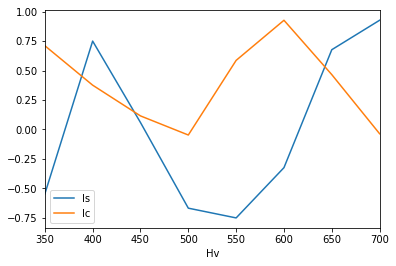

In [9]:
sdata.plot(x='Hv', y=['Is', 'Ic'])